# Image filtering

Author: [Lucas Mercier](https://www.lucasmercier.me/)

Updated: 30/09/2024

In [1]:
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_multiples(images, titles=[], hide_axis=True):
    for idx, im in enumerate(images):
        plt.subplot(1, len(images), idx+1)
        if len(im.shape) == 2:
            plt.imshow(im, cmap="gray")
        else:
            plt.imshow(im)
        if hide_axis:
            plt.axis('off')
        if titles:
            plt.title(titles[idx])

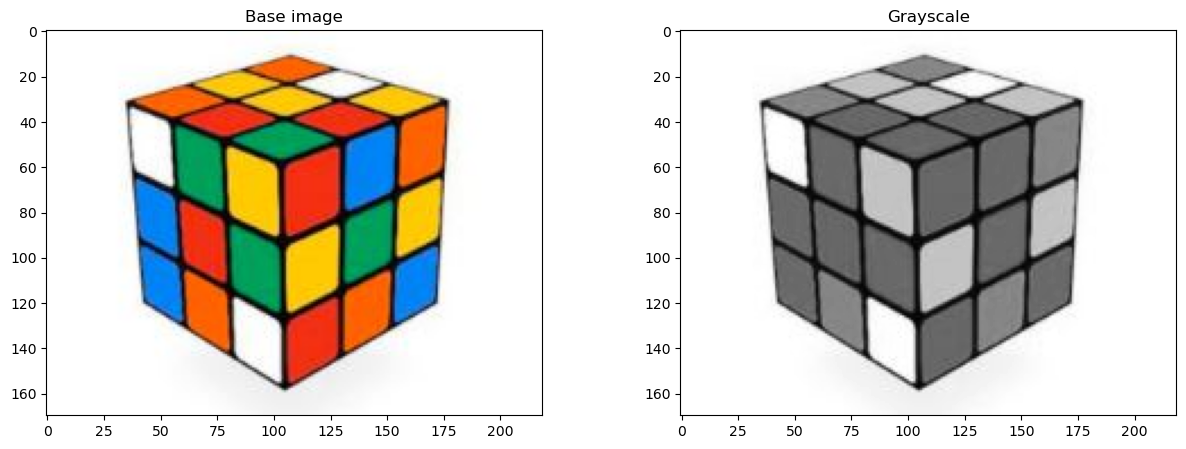

In [4]:
image_base = cv2.imread("images/cube.jpg")
image = cv2.cvtColor(image_base, cv2.COLOR_BGR2GRAY)
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))
show_multiples([image_base, image], ["Base image", "Grayscale"], hide_axis=False)
plt.show()

Now let's inspect our image. To visualize it we are going to take a slice of our grayscale image. As the image is a 2D matrix of shape (Height, Width), we can take a slice at height = h and visualize our signal:

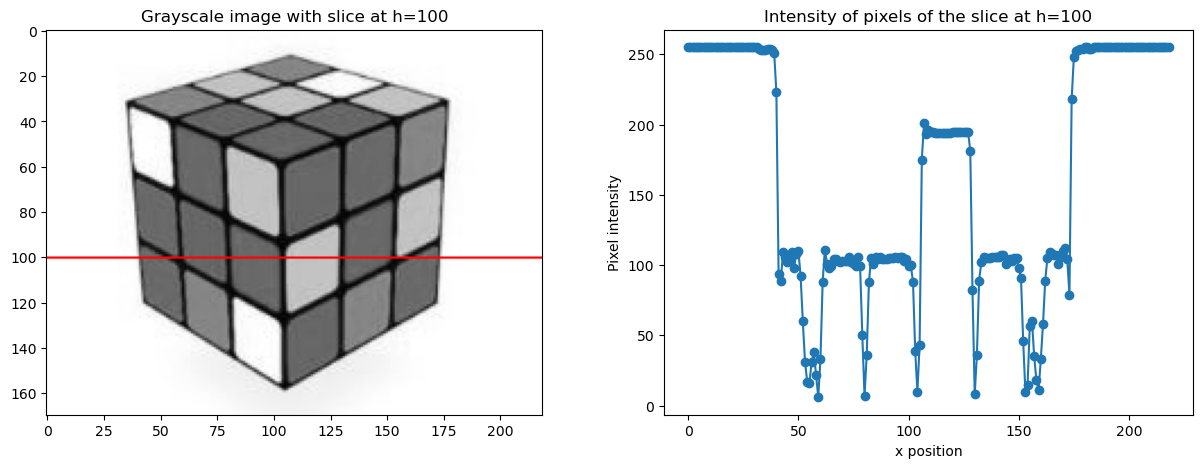

In [5]:
def intensity_plot(image, height):
    plt.title(f"Intensity of pixels of the slice at h={height}")
    plt.ylabel("Pixel intensity")
    plt.xlabel("x position")
    image_slice = image[height]
    plt.plot(image_slice, '-o')
    
def inspect_slice_of_image(image, height):
    # Draw a line to see what slice we are taking
    
    # cv2 modifies the image, we are going the reuse the grayscale image later and we don't want a red line on it!
    image_line = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB) 
    image_line = cv2.line(image_line, (round(0), round(height)), (round(image.shape[1]), round(height)), (255, 0, 0), 1)
    
    plt.subplot(1, 2, 1)
    plt.title(f"Grayscale image with slice at h={height}")
    plt.imshow(image_line)
    
    plt.subplot(1, 2, 2)
    intensity_plot(image, height)
    
    plt.show()
    
    
plt.figure(figsize=(15, 5))
inspect_slice_of_image(image, height=100)
plt.show()

We can see that the intensity of pixels isn't constant. There is a big visual contrast between the cube and the white background. This phenomenom can be viewed in the right plot. **Edges and contours seems to produce high intensity variation!**

# Noise


Let's add some noise to see how it impacts the image

In [9]:
def sp_noise(image ,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

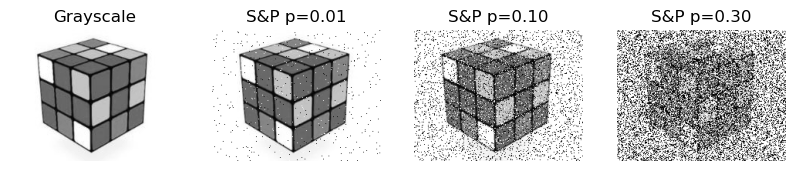

In [7]:
noisy_images = []
noises = []
for p in [.01, .1, .3]:
    salt_image = sp_noise(image, p)
    noisy_images.append(salt_image)
    noises.append(f"S&P p={p:.2f}")
    
plt.figure(figsize=(10,5))
show_multiples([image]+noisy_images, ["Grayscale"]+noises)
plt.show()

Let's now visualize pixel-intensity plots of each noisy images to see how it has been affected:

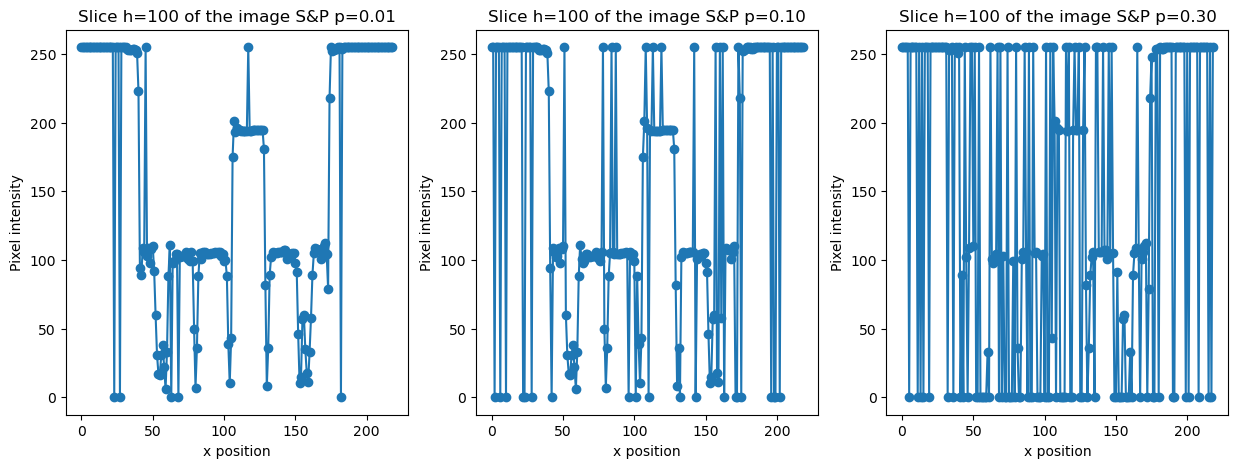

In [8]:
height = 100
plt.figure(figsize=(15, 5))
for idx, img in enumerate(noisy_images):
    plt.subplot(1, len(noisy_images), idx+1)
    intensity_plot(img, height=height)
    plt.title(f"Slice h={height} of the image {noises[idx]}")
    
plt.show()

# Conclusions

We can clearly see that adding noise in the image, add high variations in the plot, meaning noise = lot of changes (small or big) in intensity.

In some case we might want to remove noise from images and in other case detect contours from images.

This is a well known problem called filtering, in our case:

- If we want to extract contours from image, we want to keep only high variations so we are going to apply a **high-pass filter**
- If we want to remove noise, we want to filter out variations caused by noise se we are going to apply a **low-pass filter**